# CRIME IN BOSTON EDA

# 1. DATA UNDERSTANDING & PROBLEM STATEMENT

Data:
https://www.kaggle.com/datasets/AnalyzeBoston/crimes-in-boston

Dataset merupakan data berupa respon dari Boston Police Department dalam merespon tindak kejatahan / panggilan untuk membantu masyarakat yang terjadi dari tahun 2015 sampai dengan 2018.

Latar Belakang :

**Boston Police Department ingin meningkatkan kecepatan dan kesiagaan dalam merespon tindak kejahatan ataupun panggilan dari masyarakat yang terjadi di kota Boston**

Tujuan Analis :

**Membantu Boston Police Department dalam membuat kebijakan untuk menempatkan team yang akan siaga dalam merespon tindak kejahatan/ panggilan masyarakat yang terjadi di kota Boston**

Dalam mencapai tujuan analisis tersebut, saya membuat beberapa pertanyaan lanjutan, yaitu:
1. Kapan tindak kejahatan / bantuan polisi paling sering dibutuhkan berdasarkan waktu terjadinya?
2. Apa bentuk kejahatan / tindakan polisi yang paling sering terjadi di kota Boston?
3. Daerah mana yang paling sering mengalami tindak kejahatan / membutuhkan tindakan kepolisian di kota Boston?
4. Kelompok kejahatan / tindakan Kepolisian mana yang sering berpotensi untuk terjadinya Penggunaan senjata api (Penembakan), dan daerah yang sering terjadi?

Domain Knowladge :
1. Boston ialah kota pelajar di Amerika Serikat, karena kualitas pendidikan kota boston merupakan salah satu yang terbaik di Amerika Serikat, karena itu banyak pelajar yang datang dari berbagai daerah ataupun dari negara lain yang mengenyam pendidikan di Kota Boston. (https://www.hotcourses.co.id/study-in-usa/destination-guides/5-kota-terbaik-di-usa-bagi-pelajar-internasional/)
2. Amerika Serikat memulai tahun ajaran baru pada akhir Juli atau awal Agustus, oleh karena itu pada bulan ini kota-kota pelajar di Amerika Serikat mulai kembali didatangi oleh para pelajar untuk memulai Tahun Ajaran Baru.(https://www.hotcourses.co.id/study-in-usa/destination-guides/5-kota-terbaik-di-usa-bagi-pelajar-internasional/)

In [1]:
# Import Library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Terdapat 2 dataset pada data Crime In Boston yaitu : 'crime.csv' dan 'offense_code.csv'

In [2]:
# Tampilkan Dataset"crime.csv"
crime = pd.read_csv("crime.csv",encoding_errors='ignore')
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
# Tampilkan Dataset "offense_codes.csv"
oc = pd.read_csv('offense_codes.csv', encoding_errors ='ignore')
oc.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


*Dari data terlihat bahwa isi dari dataset offense_code sudah berada di dalam dataset crime, maka dataset offense_code di abaikan* 

In [4]:
crime.shape

(319073, 17)

In [5]:
crime.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [6]:
# Melihat 5 data teratas dan 5 data terbawah
display(crime.head(),crime.tail())

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [7]:
# Tampilkan info kolom dari dataset
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

Terdapat 17 Kolom data yang berapa pada dataset crime yang terdiri dari :
   1.  INCIDENT_NUMBER     = Kode dari Laporan Kegiatan Kepolisian yang Terjadi
   2.  OFFENSE_CODE        = Kode Nomer Kejahatan / Tindakan Kepolisian 
   3.  OFFENSE_CODE_GROUP  = Kelompok dari tipe kejahatan / tindakan kepolisian 
   4.  OFFENSE_DESCRIPTION = Deskripsi tipe kejahatan / tindakan kepolisian
   5.  DISTRICT            = Distrik terjadinya kejahatan / tindakan kepolisian 
   6.  REPORTING_AREA      = Kode tempat pelaporan kejahatan / tindakan kepolisian
   7.  SHOOTING            = Apakah terjadi penempabakan (NaN/Y)
   8.  OCCURRED_ON_DATE    = Tanggal dan waktu kejahatan / tindakan terjadi
   9.  YEAR                = Tahun kejahatan / tindakan terjadi 
   10. MONTH               = Bulan kejahatan / tindakan terjadi
   11. DAY_OF_WEEK         = Hari kejahatan / tindakan terjadi
   12. HOUR                = Jam Kejahatan / tindakan terjadi 
   13. UCR_PART            = Penggolangan jenis kejahatan / tindakan 
   14. STREET              = Nama jalan tempat kejahatan / tindakan terjadi
   15. Lat                 = Latitude tempat kejahatan / tindakan terjadi
   16. Long                = Longitude tempat kejahatan / kejadian terjadi
   17. Location            = Lokasi kejadi berisi Latitude dan Longitude tempat kejahatan / tindakan terjadi

In [8]:
# Melihat data uniq di setiap kolom dataset
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in crime.columns :
    listItem.append( [col, crime[col].nunique(), crime[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,INCIDENT_NUMBER,282517,"[I182070945, I182070943, I182070941, I182070940, I182070938, I182070936, I182070933, I182070932, I182070931, I182070929, I182070928, I182070927, I182070923, I182070922, I182070921, I182070920, I182070919, I182070918, I182070917, I182070915, I182070913, I182070911, I182070910, I182070909, I182070908, I182070906, I182070905, I182070904, I182070903, I182070901, I182070900, I182070898, I182070897, I182070895, I182070893, I182070892, I182070891, I182070890, I182070889, I182070888, I182070887, I182070886, I182070885, I182070882, I182070881, I182070880, I182070879, I182070877, I182070876, I182070875, I182070874, I182070873, I182070872, I182070871, I182070870, I182070868, I182070866, I182070865, I182070863, I182070862, I182070861, I182070860, I182070859, I182070858, I182070857, I182070856, I182070855, I182070854, I182070852, I182070851, I182070850, I182070849, I182070847, I182070846, I182070844, I182070843, I182070842, I182070841, I182070840, I182070839, I182070838, I182070837, I182070836, I182070835, I182070834, I182070833, I182070832, I182070831, I182070830, I182070829, I182070828, I182070827, I182070826, I182070825, I182070824, I182070823, I182070822, I182070820, I182070819, I182070818, ...]"
1,OFFENSE_CODE,222,"[619, 1402, 3410, 3114, 3820, 724, 3301, 301, 3108, 2647, 3201, 3006, 3305, 614, 3801, 3803, 522, 3831, 802, 2007, 2900, 2907, 2629, 2662, 3207, 613, 3109, 2612, 1843, 3125, 1841, 3802, 3018, 2405, 617, 3625, 3106, 3501, 3115, 616, 3807, 1102, 1849, 2905, 1810, 1842, 1806, 1848, 1844, 423, 3205, 413, 1501, 3001, 3830, 561, 2914, 2610, 1109, 706, 2403, 3160, 900, 801, 3002, 520, 2648, 670, 615, 3116, 1504, 1830, 361, 2006, 311, 1001, 3810, 2401, 2646, 3821, 3811, 3007, 2660, 1831, 3119, 3170, 1874, 3112, 3502, 735, 612, 560, 381, 3402, 1815, 1107, 2101, 1106, 3202, 1503, ...]"
2,OFFENSE_CODE_GROUP,67,"[Larceny, Vandalism, Towed, Investigate Property, Motor Vehicle Accident Response, Auto Theft, Verbal Disputes, Robbery, Fire Related Reports, Other, Property Lost, Medical Assistance, Assembly or Gathering Violations, Larceny From Motor Vehicle, Residential Burglary, Simple Assault, Restraining Order Violations, Violations, Harassment, Ballistics, Property Found, Police Service Incidents, Drug Violation, Warrant Arrests, Disorderly Conduct, Property Related Damage, Missing Person Reported, Investigate Person, Fraud, Aggravated Assault, License Plate Related Incidents, Firearm Violations, Other Burglary, Arson, Bomb Hoax, Harbor Related Incidents, Counterfeiting, Liquor Violation, Firearm Discovery, Landlord/Tenant Disputes, Missing Person Located, Auto Theft Recovery, Service, Operating Under the Influence, Confidence Games, Search Warrants, License Violation, Commercial Burglary, HOME INVASION, Recovered Stolen Property, Offenses Against Child / Family, Prostitution, Evading Fare, Prisoner Related Incidents, Homicide, Embezzlement, Explosives, Criminal Harassment, Phone Call Complaints, Aircraft, Biological Threat, Manslaughter, Gambling, INVESTIGATE PERSON, HUMAN TRAFFICKING, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, Burglary - No Property Taken]"
3,OFFENSE_DESCRIPTION,244,"[LARCENY ALL OTHERS, VANDALISM, TOWED MOTOR VEHICLE, INVESTIGATE PROPERTY, M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY, AUTO THEFT, VERBAL DISPUTE, ROBBERY - STREET, FIRE REPORT - HOUSE, BUILDING, ETC., THREATS TO DO BODILY HARM, PROPERTY - LOST, SICK/INJURED/MEDICAL - PERSON, DEMONSTRATIONS/RIOT, LARCENY THEFT FROM MV - NON-ACCESSORY, M/V ACCIDENT - OTHER, M/V ACCIDENT - PERSONAL INJURY, BURGLARY - RESIDENTIAL - NO FORCE, M/V - LEAVING SCENE - PROPERTY DAMAGE, ASSAULT SIMPLE - BATTERY, VIOL. OF RESTRAINING ORDER W NO ARREST, VAL - VIOLATION OF AUTO LAW - OTHER, VAL - OPERATING AFTER REV/SUSP., HARASSMENT, BALLISTICS EVIDENCE/FOUND, PROPERTY - FOUND, LARCENY SHOPLIFTING, SERVICE TO OTHER PD INSIDE OF MA., FIRE REPORT/ALARM - FALSE, DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP, WARRANT

In [9]:
crime.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE           222   
OFFENSE_CODE_GROUP     67    
OFFENSE_DESCRIPTION    244   
DISTRICT               12    
REPORTING_AREA         879   
SHOOTING               1     
OCCURRED_ON_DATE       233229
YEAR                   4     
MONTH                  12    
DAY_OF_WEEK            7     
HOUR                   24    
UCR_PART               4     
STREET                 4657  
Lat                    18178 
Long                   18178 
Location               18194 
dtype: int64

In [10]:
display(crime.describe(), crime.describe(include='object'))

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319073,319073,319073,317308,319073,1019,319073,319073,318983,308202,319073
unique,282517,67,244,12,879,1,233229,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2017-06-01 00:00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49945,20250,1019,29,48495,158553,14194,19999


In [11]:
# Melihat apakah ada data duplicate dalam dataset
crime.duplicated().sum()

23

In [12]:
# Melakuakan drop data duplicate
crime.drop_duplicates(inplace=True)

In [13]:
crime.shape

(319050, 17)

Secara umum, kita bisa melihat bahwa:
* dataset crime in boston memiliki 17 kolom dan 319073 barisdata.
* setelah dilihat ternyata dataset memiliki data duplicate. agar analisis menjadi maksimal maka data duplicate akan di drop maka dataset memiliki 17 kolom dan 319050 baris data.
* data yang dikumpulkan dari Juli 2015 sampai Agustus 2018
* kolom `INCIDENT_NUMBER` berisikan id unik untuk tiap report kejahatan / tindakan.
* kolom `DISTRICT` berisi kode dari daerah district tersebut, untuk memudahkan analisa maka kode district akan diganti sesuai dengan nama asli district
* beberapa kolom, yaitu, `DISTRICT`, `SHOOTING`, `UCR_PART `, `STREET`, `Lat`, `Long` dan `Location` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `OCCURRED_ON_DATE` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya berisikan data datetime. Mari kita cek lebih detil.
* kolom `OCCURRED_ON_DATE` akan di ekstrak kepada beberapa kolom seperti `Day`, `Week`, `Month` & `Year`
* saya berasumsi bahwa data kosong pada kolom `SHOOTING` bahwa tidak ada penembakan pada saat itu makan data kosong akan di ubah menjadi "N" (No Shooting/Tidak terjadi penembakan)
* kolom `lat` dan `long` terdapat nilai -1, yang dimana merupakan suatu kesalahan dan akan diubah menjadi NaN
* kolom `LOCATION` terdapat (0.00000000, 0.00000000), yang dimana merupakan suatu kesalahan dan akan diubah menjadi NaN 
* beberapa kolom data kategorik ordinal seperti `Month` dan `Day` , bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis (opsional).

# DATA FIXING & CLEANING

In [14]:
# Mengganti nama kolom untuk menyederhanakan dalam intepretasi data
rename = {'INCIDENT_NUMBER': 'Incident Number',
          'OFFENSE_CODE':'Crime Code', 
          'OFFENSE_CODE_GROUP':'Crime Group',
          'OFFENSE_DESCRIPTION':'Crime Description',
          'DISTRICT':'District',
          'REPORTING_AREA':'Reporting Area',
          'SHOOTING':'Shooting',
          'OCCURRED_ON_DATE':'Date',
          'YEAR':'Year',
          'MONTH':'Month',
          'DAY_OF_WEEK':'Day',
          'HOUR':'Hour',
          'UCR_PART' : 'Uniform Crime Report',
          'STREET':'Street',
          'Lat' : 'Latitude',
          'Long' : 'Longitude',
          'Location' :'Location'}
crime.rename(columns=rename, inplace=True)
crime.head()

,Incident Number,Crime Code,Crime Group,Crime Description,District,Reporting Area,Shooting,Date,Year,Month,Day,Hour,Uniform Crime Report,Street,Latitude,Longitude,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


<AxesSubplot:>

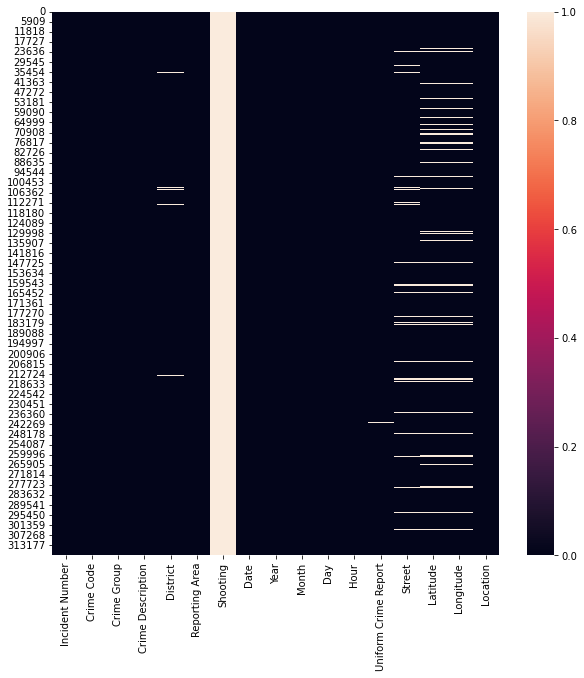

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(crime[['Incident Number',
                   'Crime Code',
                   'Crime Group',
                   'Crime Description',
                   'District',
                   'Reporting Area',
                   'Shooting',
                   'Date',
                   'Year',
                   'Month',
                   'Day',
                   'Hour',
                   'Uniform Crime Report',
                   'Street',
                   'Latitude',
                   'Longitude',
                   'Location']].isna())

In [16]:
# persentase missing value di tiap kolom
crime.isna().sum()/crime.shape[0]*100

Incident Number         0.000000 
Crime Code              0.000000 
Crime Group             0.000000 
Crime Description       0.000000 
District                0.553205 
Reporting Area          0.000000 
Shooting                99.680614
Date                    0.000000 
Year                    0.000000 
Month                   0.000000 
Day                     0.000000 
Hour                    0.000000 
Uniform Crime Report    0.028209 
Street                  3.407303 
Latitude                6.267983 
Longitude               6.267983 
Location                0.000000 
dtype: float64

* missing value di kolom `DISTRICT`, `UCR_PART`, `STREET`, `Lat`, `Long` memiliki persentase di bawah (<10%) oleh karena itu saya memilih untuk menghapus baris/kolom yang berisi missing value pada kolom tersebut 
* Namun, pada kolom `SHOOTING` saya berasumsi bahwa missing value artinya 'No Shooting' atau tidak terjadi penembakan maka missing value akan di isi dengan 'N'

### Memperbaiki kolom yang tidak sesuai

In [17]:
#Memperbaiki kolom Reporting Area yang berisi 000 dan string kosong (" ") menjadi NaN
crime['Reporting Area'] = crime['Reporting Area'].replace('000',np.nan)
crime['Reporting Area'] = crime['Reporting Area'].replace(" ",np.nan)

In [18]:
crime[(crime['Reporting Area']=="000") | (crime['Reporting Area']==" ")]

,Incident Number,Crime Code,Crime Group,Crime Description,District,Reporting Area,Shooting,Date,Year,Month,Day,Hour,Uniform Crime Report,Street,Latitude,Longitude,Location


In [19]:
# Memperbaiki Kolom Latitude dan Longitude yang berisi (-1.0) mejadi NaN
crime.Latitude.replace(-1, None, inplace=True)
crime.Longitude.replace(-1, None, inplace=True)

In [20]:
crime[(crime['Latitude']=="-1.0") | (crime['Longitude']=="-1.0")]

,Incident Number,Crime Code,Crime Group,Crime Description,District,Reporting Area,Shooting,Date,Year,Month,Day,Hour,Uniform Crime Report,Street,Latitude,Longitude,Location


In [21]:
# Memperbaiki kolom Location yang berisi (-1.00000000, -1.00000000) dan (0.00000000, 0.00000000) menjadi NaN
crime['Location'] = crime['Location'].replace('(-1.00000000, -1.00000000)', np.nan)
crime['Location'] = crime['Location'].replace('(0.00000000, 0.00000000)', np.nan)

In [22]:
crime[(crime['Location']=="(-1.00000000, -1.00000000)") | (crime['Location']=="(-1.00000000, -1.00000000)")]

,Incident Number,Crime Code,Crime Group,Crime Description,District,Reporting Area,Shooting,Date,Year,Month,Day,Hour,Uniform Crime Report,Street,Latitude,Longitude,Location


In [23]:
# Mengubah kode district menjadi nama distrcit pada kolom DISTRICT
crime.District.replace({'A1' : 'Downtown',
'A15': 'Charlestown',
'A7': 'East Boston',
'B2': 'Roxbury',
'B3': 'Mattapan',
'C6': 'South Boston',
'C11': 'Dorchester',
'D4': 'South End',
'D14': 'Brighton',
'E5': 'West Roxbury',
'E13': 'Jamaica Plain',
'E18':'Hyde Park'}, inplace=True)

In [24]:
# Memperbaiki Kolom Date menjadi datetime
crime['Date'] = pd.to_datetime(crime['Date'])
crime["Year"]=crime["Date"].dt.year
crime["Month"]=crime["Date"].dt.month
# Menambah kolom week pada dataset
crime["Week"]=crime["Date"].dt.day_name()
crime["Hour"]=crime["Date"].dt.hour
# Mengubah kolom Month menjadi category
crime['Month'].astype('category')
# Mengubah angka menjadi nama bulan pada kolom Month
crime.Month.replace(([1,2,3,4,5,6,7,8,9,10,11,12]),(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Des']),inplace=True)
# Mengubah kolom week agar berisi "Weekday" dan "Weekend"
crime['Week'] = crime['Week'].apply(lambda x : 'Weekend' if (x == 'Saturday') | (x == 'Sunday') else 'Weekday')
crime.Hour.replace(0, 24, inplace=True)
# Mengubah kolom Day dan Month agar menjadi berurutan 
crime["Day"] = pd.Categorical(crime["Day"], 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)
crime['Month']= pd.Categorical(crime['Month'],
              categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Des'],
              ordered=True)
crime[['Date','Hour','Day','Week','Month','Year']]

,Date,Hour,Day,Week,Month,Year
0,2018-09-02 13:00:00,13,Sunday,Weekend,Sep,2018
1,2018-08-21 00:00:00,24,Tuesday,Weekday,Aug,2018
2,2018-09-03 19:27:00,19,Monday,Weekday,Sep,2018
3,2018-09-03 21:16:00,21,Monday,Weekday,Sep,2018
4,2018-09-03 21:05:00,21,Monday,Weekday,Sep,2018
...,...,...,...,...,...,...
319068,2016-06-05 17:25:00,17,Sunday,Weekend,Jun,2016
319069,2015-07-09 13:38:00,13,Thursday,Weekday,Jul,2015
319070,2015-07-09 13:38:00,13,Thursday,Weekday,Jul,2015
319071,2016-05-31 19:35:00,19,Tuesday,Weekday,May,2016


In [25]:
crime.shape

(319050, 18)

In [26]:
crime.isnull().sum()

Incident Number         0     
Crime Code              0     
Crime Group             0     
Crime Description       0     
District                1765  
Reporting Area          20263 
Shooting                318031
Date                    0     
Year                    0     
Month                   0     
Day                     0     
Hour                    0     
Uniform Crime Report    90    
Street                  10871 
Latitude                20743 
Longitude               20743 
Location                20743 
Week                    0     
dtype: int64

Setelah Data yang tidak sesuai sudah diperbaiki, Masih Terdapat Missing Value di kolom `District`, `Reporting Area`, `Shooting`.`Uniform Crime Report`, `Street`,`Latitude`, `Longitude`, `Location`

### Mengatasi Missing Value

In [27]:
# persentase missing value di tiap kolom
crime.isna().sum()/crime.shape[0]*100

Incident Number         0.000000 
Crime Code              0.000000 
Crime Group             0.000000 
Crime Description       0.000000 
District                0.553205 
Reporting Area          6.351042 
Shooting                99.680614
Date                    0.000000 
Year                    0.000000 
Month                   0.000000 
Day                     0.000000 
Hour                    0.000000 
Uniform Crime Report    0.028209 
Street                  3.407303 
Latitude                6.501489 
Longitude               6.501489 
Location                6.501489 
Week                    0.000000 
dtype: float64

In [28]:
crime.isnull().sum()

Incident Number         0     
Crime Code              0     
Crime Group             0     
Crime Description       0     
District                1765  
Reporting Area          20263 
Shooting                318031
Date                    0     
Year                    0     
Month                   0     
Day                     0     
Hour                    0     
Uniform Crime Report    90    
Street                  10871 
Latitude                20743 
Longitude               20743 
Location                20743 
Week                    0     
dtype: int64

In [29]:
# Mengisi Missing Value pada Kolom Shooting menjadi 'N' (No Shooting/Tidak terjadi Penembakan)
crime['Shooting'].fillna('N', inplace=True)

In [30]:
# Mengecek apakah kolom yang berisi data kosong pada Latitude juga terdapat pada kolom Longitude dan Location
crime.iloc[np.where(crime["Latitude"].isna())[0]][['Latitude','Longitude','Location']]

,Latitude,Longitude,Location
20,None,None,NaN
42,NaN,NaN,NaN
126,None,None,NaN
252,None,None,NaN
386,NaN,NaN,NaN
...,...,...,...
319015,NaN,NaN,NaN
319016,NaN,NaN,NaN
319017,NaN,NaN,NaN
319042,NaN,NaN,NaN


Ternyata kolom yang memiliki Latitude NaN memiliki Longitude dan Location yang NaN juga oleh karena itu Missing Value pada kolom Latitude, Longitude dan Location akan di drop

In [31]:
# Drop Missing Value pada kolom Latitude, Longitude dan Location 
crime=crime.dropna(subset=['Latitude', 'Longitude', 'Location'])

In [32]:
# Drop Missing Value pada kolom District, Reporting Area, Uniform Crime Report dan Street
crime=crime.dropna(subset=['District','Reporting Area','Uniform Crime Report','Street'])
crime

,Incident Number,Crime Code,Crime Group,Crime Description,District,Reporting Area,Shooting,Date,Year,Month,Day,Hour,Uniform Crime Report,Street,Latitude,Longitude,Location,Week
0,I182070945,619,Larceny,LARCENY ALL OTHERS,Brighton,808,N,2018-09-02 13:00:00,2018,Sep,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Weekend
1,I182070943,1402,Vandalism,VANDALISM,Dorchester,347,N,2018-08-21 00:00:00,2018,Aug,Tuesday,24,Part Two,HECLA ST,42.306821,-71.0603,"(42.30682138, -71.06030035)",Weekday
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,South End,151,N,2018-09-03 19:27:00,2018,Sep,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",Weekday
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,South End,272,N,2018-09-03 21:16:00,2018,Sep,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",Weekday
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,Mattapan,421,N,2018-09-03 21:05:00,2018,Sep,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,South End,285,N,2016-06-05 17:25:00,2016,Jun,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",Weekend
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",Hyde Park,520,N,2015-07-09 13:38:00,2015,Jul,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",Weekday
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,Hyde Park,520,N,2015-07-09 13:38:00,2015,Jul,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",Weekday
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,Jamaica Plain,569,N,2016-05-31 19:35:00,2016,May,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",Weekday


Karena Kolom `District`, `Reporting Area`, `Uniform Crime Report` dan Street memiliki proporsi yang rendah (<10%)

In [33]:
crime.isnull().sum()

Incident Number         0
Crime Code              0
Crime Group             0
Crime Description       0
District                0
Reporting Area          0
Shooting                0
Date                    0
Year                    0
Month                   0
Day                     0
Hour                    0
Uniform Crime Report    0
Street                  0
Latitude                0
Longitude               0
Location                0
Week                    0
dtype: int64

In [34]:
crime.shape

(296030, 18)

In [35]:
# Melihat Data yang sudah dibersihkan
crime.head()

,Incident Number,Crime Code,Crime Group,Crime Description,District,Reporting Area,Shooting,Date,Year,Month,Day,Hour,Uniform Crime Report,Street,Latitude,Longitude,Location,Week
0,I182070945,619,Larceny,LARCENY ALL OTHERS,Brighton,808,N,2018-09-02 13:00:00,2018,Sep,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Weekend
1,I182070943,1402,Vandalism,VANDALISM,Dorchester,347,N,2018-08-21 00:00:00,2018,Aug,Tuesday,24,Part Two,HECLA ST,42.306821,-71.0603,"(42.30682138, -71.06030035)",Weekday
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,South End,151,N,2018-09-03 19:27:00,2018,Sep,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",Weekday
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,South End,272,N,2018-09-03 21:16:00,2018,Sep,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",Weekday
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,Mattapan,421,N,2018-09-03 21:05:00,2018,Sep,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",Weekday


Dataset awal memiliki 319.073 baris dan 17 kolom data, setelah di hilangkan data duplikat kita memiliki 319.050 baris dan 17 kolom data, setalah data di perbaiki dan sisesuaikan kita memiliki 319.050 baris dan 18 kolom data dan setelah kita bersihkan sekarang kita memiliki **296.030** baris dan **18** Kolom. Dimana 23 baris data yang duplikat dihapus, 23.020 baris data yang missing di hapus, penambahan 1 kolom week dan sisa data kosong diisi dengan data yang dirasa relevan.

In [36]:
crime.to_csv("crime_cleaning.csv", index=False)

# DATA ANALYSIS & VISUALIZATION

### 1.  Kapan Kejahatan / Tindakan Kepolisian Paling Sering Dilakukan Berdasarkan Waktu Terjadinya? 

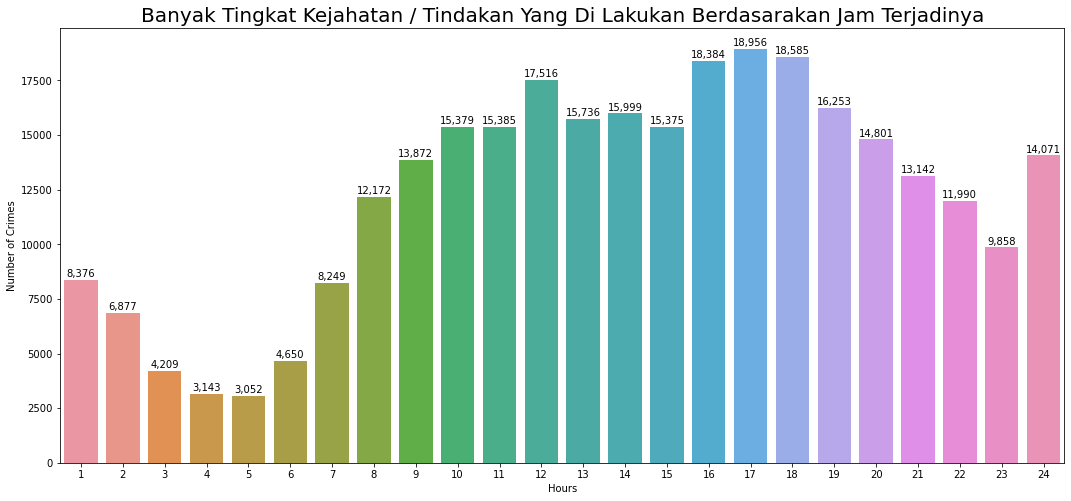

In [37]:
# Ingin Melihat Tingkat Kejahatan / Tindakan Yang Di Lakukan Berdasarakan Jam Terjadinya
plt.figure(figsize=(18,8)) 
ax=sns.countplot(x='Hour',data=crime)
plt.title('Banyak Tingkat Kejahatan / Tindakan Yang Di Lakukan Berdasarakan Jam Terjadinya',fontsize=20)
plt.xlabel('Hours')
plt.ylabel('Number of Crimes')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.show()

Insight:

**Dari visualisasi terlihat bahwa tindak kejahatan ataupun tindakan mulai meningkat pada pukul 09.00 - 12.00 kemudian perlahan turun pada pukul 13.00 dan kembali meningkat pada pukul 16.00 sampai dengan tindak kejahatan / tindakan kepolisian paling banyak di lakukan pada pukul 17.00 setelah itu mulai mengalami penurunan sampai pukul 05.00. dari sini bisa dilihat bahwa tindak kejahatan / tindakan kepolisian mulai meningkat pada saat masyarakat mulai melakukan aktivitas di luar rumah (jam produktif) dan terjadi peningkatan jumlah aktivitas di jalanan boston yakni pada saat orang mulai berangkat kerja/sekolah 09.00 dan saat orang istirahat pukul 12.00 dan orang mulai kembali ke rumah mulai pukul 16.00 - 17.00**

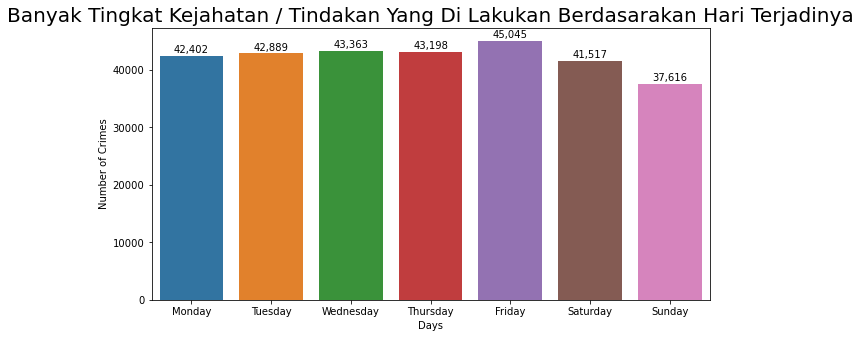

In [38]:
# Ingin Melihat Tingkat kejahatan berdasarakan Hari terjadinya
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Day',data=crime)
plt.title(f'Banyak Tingkat Kejahatan / Tindakan Yang Di Lakukan Berdasarakan Hari Terjadinya',fontsize=20)
plt.xlabel('Days')
plt.ylabel('Number of Crimes')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.show()

Insight:

**Dari visualisasi terlihat bahwa tindak kejahatan / tindakan kepolisian paling tinggi terjadi pada hari jum'at dan paling rendah pada hari minggu, banyaknya tindak kejahatan / tidakan kepolisian pada hari kerja/weekday (senin - jum'at) relatif sama, sedangkan pada saat weekend (sabtu & minggu) tindak kejahatan / tindakan kepolisian relatif menurun, asumsinya adalah tingkat aktivitas yang di lakukan di luar rumah cenderung lebih rendah pada saat weekend.**

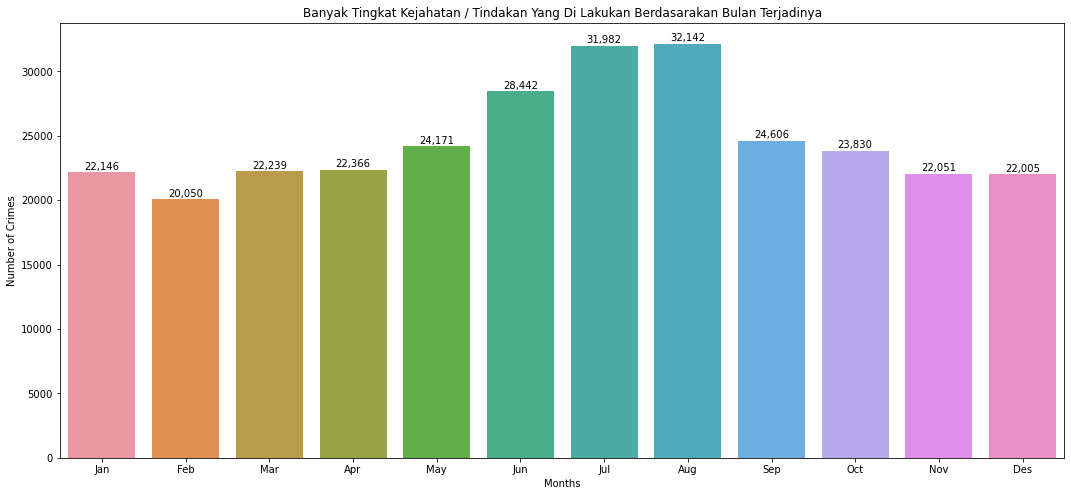

In [39]:
# Ingin Melihat Sebaran Kejahatan / Tindakan Kepolisian Berdasarakan Bulan Terjadinya
plt.figure(figsize=(18,8))
ax=sns.countplot(x="Month",data=crime)
plt.title(f'Banyak Tingkat Kejahatan / Tindakan Yang Di Lakukan Berdasarakan Bulan Terjadinya')
plt.xlabel("Months")
plt.ylabel('Number of Crimes')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.show()

Insight:

**Dari visualisasi terlihat bahwa tindak kejahatan / Tindakan kepolisian mulai meningkat pada bulan juni dan mengalami puncaknya pada bulan Agustus, dari basic knowladge diketahui bahwa pada bulan terjadinya peningkatan kejahatan / Tindakan Kepolisan bertepatan dengan dimulainya tahun ajaran baru dan kota Boston dipadati kembali oleh para pelajar yang mulai berdatangan dari setiap daerah, yang mengakibatkan terjadinya peningkatan jumlah masyarakat yang menetap di kota Boston pada bulan itu.**

In [40]:
#melihat tanggal pengambilan data awal dan akhir di tiap tahunnya
display(crime.groupby("Year").min()["Date"],crime.groupby("Year").max()["Date"])

Year
2015   2015-06-15
2016   2016-01-01
2017   2017-01-01
2018   2018-01-01
Name: Date, dtype: datetime64[ns]

Year
2015   2015-12-31 23:54:00
2016   2016-12-31 23:40:00
2017   2017-12-31 23:57:00
2018   2018-09-03 21:25:00
Name: Date, dtype: datetime64[ns]

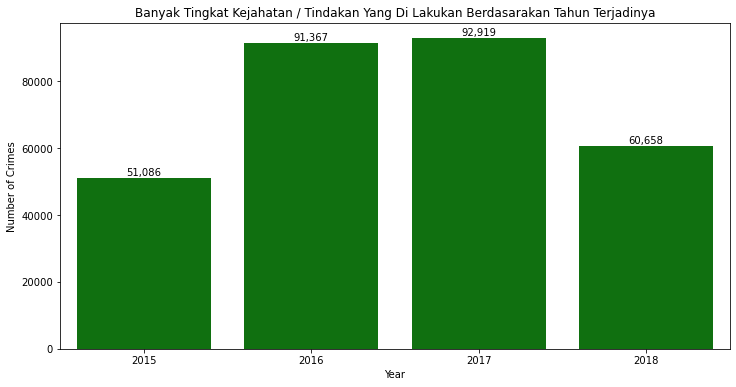

In [41]:
# Ingin Melihat Sebaran Kejahatan / Tindakan Kepolisian Berdasarakan Tahun Terjadinya
plt.figure(figsize=(12,6))
ax = sns.countplot(data=crime, x="Year", color='green', order=range(2015,2019))
plt.title(f'Banyak Tingkat Kejahatan / Tindakan Yang Di Lakukan Berdasarakan Tahun Terjadinya')
plt.xlabel(f'Year')
plt.ylabel('Number of Crimes')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.show()

Insight:

**Dilihat dari hasil analiisi lebih lanjut bahwa data pada tahun 2015 hanya terdapat 6 bulan dan data pada tahun 2018 hanya 9 bulan saja, dari data 2 tahun yang lengkap yakni 2016 dan 2017, dari visualisasi terdapat peningkatan kejahatan / Tindakan Kepolisian dari tahun 2016 ke tahun 2017.**

### 2. Apa bentuk kejahatan / tindakan polisi yang paling sering terjadi di kota Boston?

In [42]:
# Melihat Top 3 Jenis Kejahatan / Tindakan Yang Dilakukan Kepolisian 
trend_crime=crime.groupby(crime['Crime Group'])[['Crime Description']].count().reset_index().sort_values(by='Crime Description',ascending=False)[:3]
trend_crime

,Crime Group,Crime Description
39,Motor Vehicle Accident Response,30302
30,Larceny,25032
36,Medical Assistance,22324


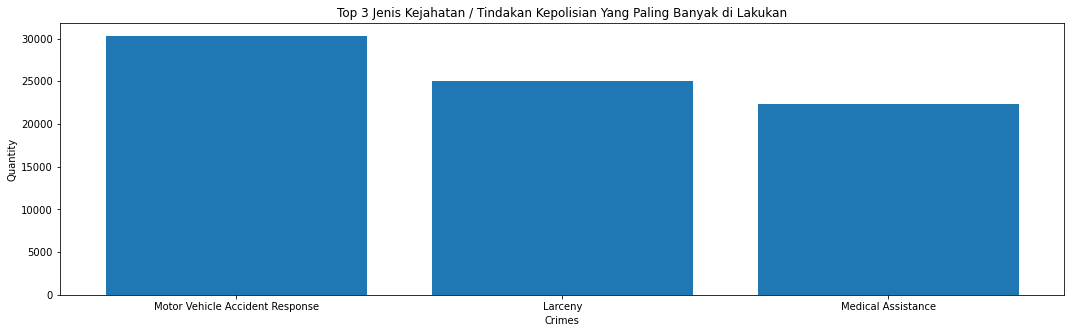

In [43]:
# Melihat Top 3 Kejahatan / Tindakan Yang Dilakukan Kepolisian
lista_offense_code_group = crime['Crime Group'].value_counts()
dict_offense_code_group = lista_offense_code_group[0:3].to_dict()

names_offense_code_group = dict_offense_code_group.keys()
values_offense_code_group = dict_offense_code_group.values()

plt.figure(figsize=[18,5])
plt.title('Top 3 Jenis Kejahatan / Tindakan Kepolisian Yang Paling Banyak di Lakukan')
plt.xlabel('Crimes')
plt.ylabel('Quantity')
plt.bar(names_offense_code_group, values_offense_code_group);

Insight : 

**3 kejahatan / Tindakan kepolisian yang paling sering terjadi adalah Motor Vehicle Accident Response (kecelakaan), Larceny (pencurian), dan Medical Assistance (kebutuhan medis)**

### 3. Daerah mana yang paling sering mengalami tindak kejahatan / membutuhkan tindakan kepolisian di kota Boston?

In [44]:
# Melihat Jalanan Yang Tingkat Kejahatan / Tindakan Kepolisian Yang Paling Sering Terjadi
crime_street = crime[['Street','Crime Group']].groupby('Street').count().sort_values(by='Crime Group',ascending=False).reset_index().head(5)
crime_street

,Street,Crime Group
0,WASHINGTON ST,14105
1,BLUE HILL AVE,6988
2,BOYLSTON ST,6938
3,DORCHESTER AVE,5006
4,TREMONT ST,4663


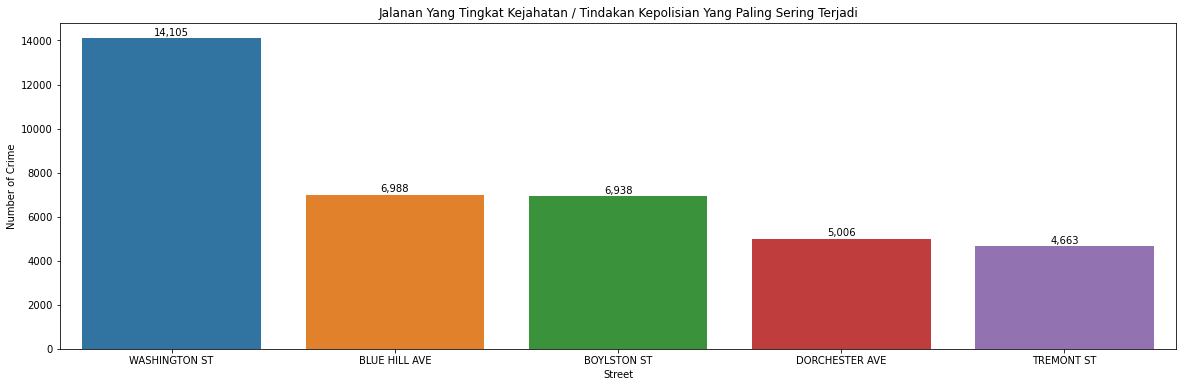

In [45]:
# Bar Plot dari Jalanan Yang Tingkat Kejahatan / Tindakan Kepolisian Yang Paling Sering Terjadi
plt.figure(figsize=(20,6))
ax = sns.barplot(x='Street', y='Crime Group',data=crime_street)
plt.title(f'Jalanan Yang Tingkat Kejahatan / Tindakan Kepolisian Yang Paling Sering Terjadi')
plt.xlabel(f'Street')
plt.ylabel('Number of Crime')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.show()

In [46]:
# Melihat Distrik Yang Tingkat Kejahatan / Tindakan Kepolisian Yang Paling Sering Terjadi
crime_district = crime[['District','Crime Group']].groupby('District').count().sort_values(by='Crime Group',ascending=False).reset_index().head(5)
crime_district
crime_district = crime[['District','Crime Group']].groupby('District').count().sort_values(by='Crime Group',ascending=False).reset_index().head(5)
crime_district

,District,Crime Group
0,Roxbury,46013
1,Dorchester,40681
2,South End,38210
3,Mattapan,33656
4,Downtown,31977


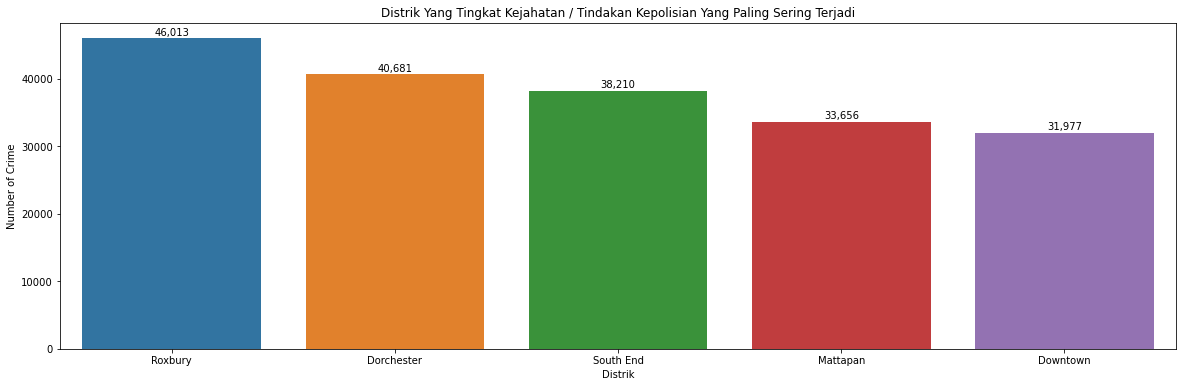

In [47]:
# Bar Plot dari Distrik Yang Tingkat Kejahatan / Tindakan Kepolisian Yang Paling Sering Terjadi
plt.figure(figsize=(20,6))
ax = sns.barplot(x='District', y='Crime Group',data=crime_district)
plt.title(f'Distrik Yang Tingkat Kejahatan / Tindakan Kepolisian Yang Paling Sering Terjadi')
plt.xlabel(f'Distrik')
plt.ylabel('Number of Crime')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.show()

Insight :

**Dari Visualisasi terlihat bahwa 5 jalanan dengan tingkat kejahatan paling tinggi terjadi di WASHINGTON ST, BLUE HILL AVE, BOYLSTON ST, DORCHESTER AVE, TREMONT ST dan 5 distrik dengan tingkat kejahatan paling tinggi adalah Roxbury, Dorchester, South End, Mattapan, dan Downtown** 

### 4. Kelompok kejahatan / tindakan Kepolisian mana yang sering berpotensi untuk terjadinya Penggunaan senjata api (Penembakan), dan daerah yang sering terjadi?

In [48]:
# Ingin Melihat Kelompok kejahatan / tindakan Kepolisian mana yang sering berpotensi untuk terjadinya Penggunaan senjata api (Penembakan)
Shooting_crime = crime[crime['Shooting']=='Y'][['Crime Group','Shooting']].groupby('Crime Group').count().sort_values(by='Shooting',ascending=False).reset_index()[:3]
Shooting_crime

,Crime Group,Shooting
0,Aggravated Assault,502
1,Homicide,113
2,Firearm Violations,69


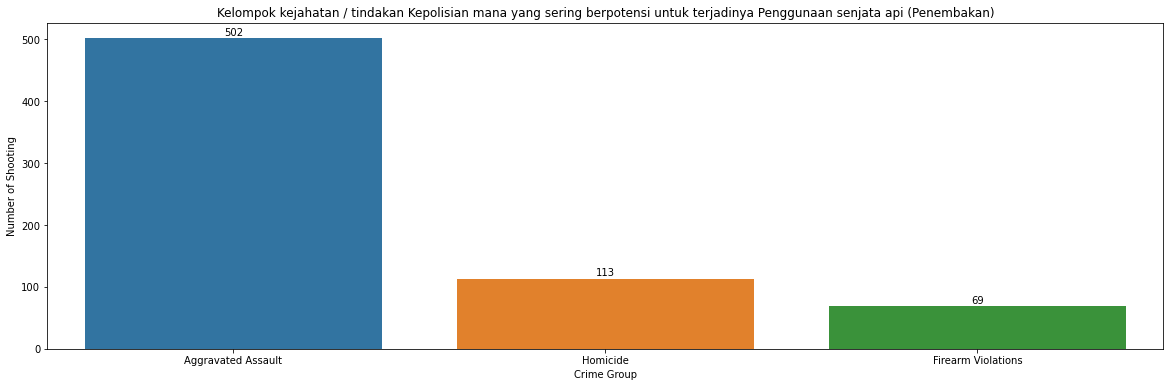

In [49]:
# Membuat plot Kelompok kejahatan / tindakan Kepolisian mana yang sering berpotensi untuk terjadinya Penggunaan senjata api (Penembakan)
plt.figure(figsize=(20,6))
ax = sns.barplot(x='Crime Group', y='Shooting',data=Shooting_crime)
plt.title(f"Kelompok kejahatan / tindakan Kepolisian mana yang sering berpotensi untuk terjadinya Penggunaan senjata api (Penembakan)")
plt.ylabel('Number of Shooting')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.show()

In [50]:
# Ingin Melihat Jalanan Mana Yang Kelompok Kejahatan / tindakan Kepolisian mana yang sering berpotensi untuk terjadinya Penggunaan senjata api (Penembakan) berdasarkan Jalannya
Shooting_street = crime[crime['Shooting']=='Y'][['Street','Shooting']].groupby('Street').count().sort_values(by='Shooting',ascending=False).reset_index()[:3]
Shooting_street

,Street,Shooting
0,WASHINGTON ST,46
1,BLUE HILL AVE,31
2,DUDLEY ST,24


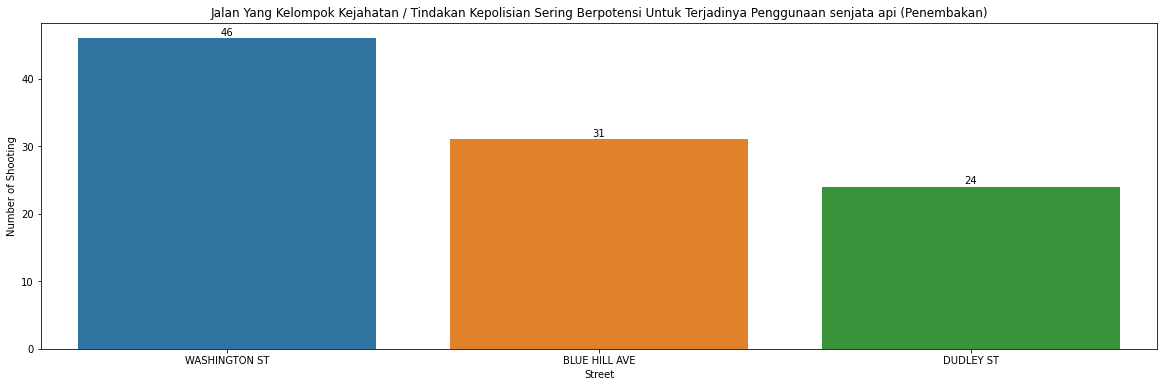

In [51]:
# Membuat plot tentang Kelompok kejahatan / tindakan Kepolisian mana yang sering berpotensi untuk terjadinya Penggunaan senjata api (Penembakan) berdasarkan Jalannya
plt.figure(figsize=(20,6))
ax = sns.barplot(x='Street', y='Shooting',data=Shooting_street)
plt.title(f'Jalan Yang Kelompok Kejahatan / Tindakan Kepolisian Sering Berpotensi Untuk Terjadinya Penggunaan senjata api (Penembakan)')
plt.xlabel(f'Street')
plt.ylabel('Number of Shooting')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.show()

In [52]:
# Ingin Melihat trend penggunaan senjata api dari tahun ke tahun
Shooting_year= crime[crime['Shooting']=='Y'][['Year','Shooting']].groupby('Year').count().sort_values(by='Shooting',ascending=False).reset_index()[:10]
Shooting_year

,Year,Shooting
0,2017,357
1,2016,267
2,2015,178
3,2018,169


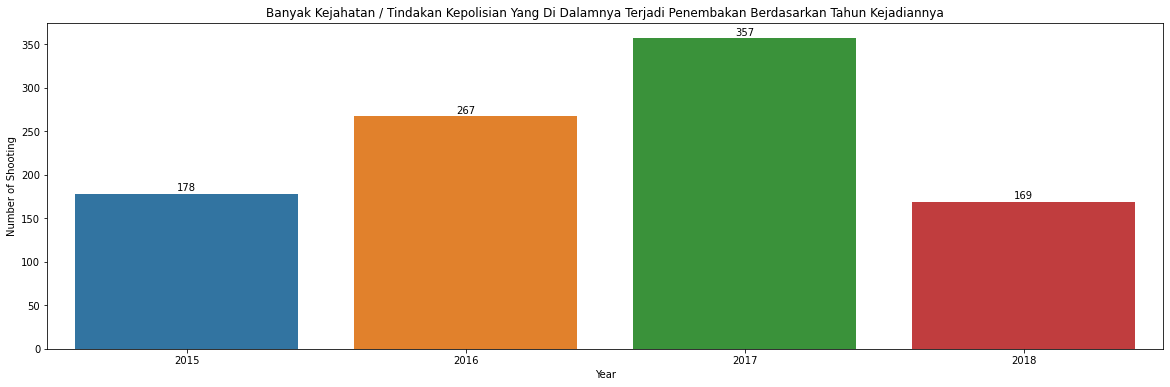

In [53]:
# Membuat plot tentang Banyak Kelompok kejahatan / tindakan Kepolisian mana yang sering berpotensi untuk terjadinya Penggunaan senjata api (Penembakan) berdasrkan Tahunnya
plt.figure(figsize=(20,6))
ax = sns.barplot(x='Year', y='Shooting',data=Shooting_year)
plt.title(f'Banyak Kejahatan / Tindakan Kepolisian Yang Di Dalamnya Terjadi Penembakan Berdasarkan Tahun Kejadiannya')
plt.xlabel(f'Year')
plt.ylabel('Number of Shooting')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.show()

Insinght : 

**Dari data terlihat bahwa jenis Kejahatan / Tindakan Kepolisian yang pada saat kejadian terjadi penembakan adalah Aggravated Assault (Penyerangan), Homicide (pembunuhan), Firearm Violations (Pelanggaran Senjata Api) dan untuk jalan yang pada saat kejadian kejahatan / tindakan kepolisiannya yang pada saat kejadian terjadi penembakan adalah WASHINGTON ST, BLUE HILL AVE, DUDLEY ST sedangkan tingkat kejahatan yang pada saat kejadian kejahatan terjadi penembakan paling tinggi terjadi pada tahun 2018 dan mengalami penurunan pada tahun 2018**

# DATA INSIGHT & RECOMMENDATION

**INSIGHT RANGKUMAN**<br>
Dari hasil analisis yang telah dilakukan terlihat bahwa kejahatan di kota Boston :

    1. Kejahatan /  Tindakan Kepolisian paling banyak terjadi pada saat mobilitas masyarakt dijalan sedang tinggi yakni spesifik mulai pukul 09.00 - 12.00 dan pada pukul 16.00 - 17.00
    2. Kejahatan / Tindakan Kepolisian paling banyak terjadi pada hari produktif masyarakat yakni hari senin -jum'at dengan jum'at menjadi hari dengan tingkat kejahatan / tindakan kepolisian tertnggi dan cenderung lebih rendah pada weekend ataupun kebanyakan masyarakat memilih untuk istirahat di rumah
    3. Kejahatan / Tindakna Kepolisian paling banyak terjadi pada Bulan juni dengan puncaknya di bulan agustus yang bertepatan dengan tahun ajaran baru yang mengakibatkan kota boston lebih ramai penduduk dari biasanya
    4. Banyaknya Kejahatan / Tindakan Kepolisian meningkat setiap tahunnya
    5. Kejahatan / Tindakan Kepolisian paling banyak tejadi di kota boston adalah Motor Vehicle Accident Response (kecelakaan), Larceny (pencurian), dan Medical Assistance (kebutuhan medis)
    6. Kejahatan / Tindakan Kepolisian paling sering terjadi di jalan WASHINGTON ST, BLUE HILL AVE, BOYLSTON ST, DORCHESTER AVE, dan TREMONT ST.
    7. Kejahatan / Tindakan Kepolisian paling sering terjadi di distrik Roxbury, Dorchester, South End, Mattapan, dan Downtown.
    8. Kejahatan / Tindakan Kepolisian dengan kemungkinan terjadi penembakan senjata api terbanyak adalah Aggravated Assault (Penyerangan), Homicide (pembunuhan), Firearm Violations (Pelanggaran Senjata Api).
    9. Kejahatan / Tindakan Kepolisian dengan kemungkinan terjadi penembakan senjata api terbanyak terjadi di jalan  WASHINGTON ST, BLUE HILL AVE, DUDLEY ST.
    10. Trend Kejahatan / Tindakan Kepolisian dengan kemungkinan terjadinya penembakan senjata api juga mengalami peningkatan dari tahun ke tahun.
    
Rekomendasi yang dapat diberikan adalah :

    1. Kepolisian boston dapat melakukan shift ganti kepada para petugas polisi dengan mengerahkan personil lebih banyak di jam yang mobilitas masyarakat lebih tinggi. 
    2. Kepolisian boston juga dapat membuat patroli lebih sering di hari weekday (senin - Jum'at) daripada hari weekend (sabtu & Minggu) tanpa mengurangi kesiagaan para personil kepolisian setiap harinya
    3. Kepolisian Boston dapat membentuk satuan khusus yang berjaga pada bulan terjadinya tahun ajaran baru yang mengakibatkan penduduk boston lebih ramai, dan juga bisa bekerja sama dengan universitas ataupun sekolah - sekolah untuk memberikan pelatihan pengamanan diri bagi para pelajar
    4. Kepolisian boston dapat membuat tim respon cepat untuk kejahatan yang paling sering terjadi di kota Boston
    5. Membuat shift patroli di jalan - jalan rawan terjadinya tindak kejahatan seperti di jalan WASHINGTON ST, BLUE HILL AVE, BOYLSTON ST, DORCHESTER AVE, dan TREMONT ST.
    6. Membuat Satuan pengaman untuk setiap distrik agar jangkauan untuk merespon tindak kejahatan lebih cepat
    7. Memberikan pengamanan lengkap pada setiap Polisi yang melakuakn patroli di jam rawan ataupun di jalan rawan yang tindak kejahatannya terdapat kemungkinan penembakan sejata api lebih tinggi.
    8. Meningkatkan jumlah anggota kepolisian, dikarenakan trend kejahatan setiap tahunnya terus meningkat.
    
**Dengan memberi fokus untuk kejahatan/kejadian yang membutuhkan tindakan kepolisian yang paling sering terjadi berdasarkan waktu, dan juga lokasi terjadi terjadinya Kepolisian Boston dapat lebih cepat dalam merespon, diharapkan analisis ini bisa membantu kepolisian Boston agar dapat membuat kebijakan baru dalam menempatkan ataupun membentuk tim baru untuk dapat cepat tanggap dalam merespon dan menangani tindak kejahatan/kejadian dan bisa meningkatkan kualitas respon dari Kepolisian Boston.**
